In [1]:
import numpy as np
import scanpy as sc
import pandas as pd

import sys
from os.path import join as opj

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from fg_shared import _fg_data

In [2]:
"""Load the meta-data, cell barcodes, features (i.e., genes) and gene expression values"""
wk4_folder = opj(_fg_data, 'SEATRAC/TB_hackday_2023/data/gideon_etal/4week')

md = pd.read_csv(opj(wk4_folder, 'Updated4wk_alexandria_structured_metadata3.txt'), sep='\t')
md = md.iloc[1:]

bc = pd.read_csv(opj(wk4_folder, '4Week_barcodes.tsv'), sep='\t', header=None)
feat = pd.read_csv(opj(wk4_folder, '4Week_features.tsv'), sep='\t', header=None)

clust = pd.read_csv(opj(wk4_folder, '4Week_ClusteringDF.csv'))
clust = clust.iloc[1:]

clust = clust.assign(X=clust['X'].astype(float),
                     Y=clust['Y'].astype(float))

md = pd.merge(md, clust, on='NAME', how='left')

"""Load raw counts (shape is [n_genes x n_cells]"""
# cts = sc.read_mtx(opj(wk4_folder, '4Week_countsmatrix.mtx'))

"""Load normalized counts"""
cts = sc.read_mtx(opj(wk4_folder, '4Week_datamatrix.mtx'))

Text(0.5, 1.0, 'Expression of top 20 genes')

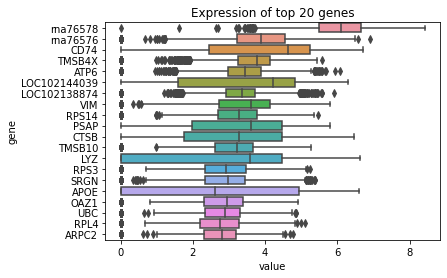

In [4]:
tot = np.asarray(cts.X.sum(axis=1)).squeeze()
sorti = np.argsort(tot)[::-1]

plot_df = pd.DataFrame(np.asarray(cts.X[sorti[:20], :].todense()), index=feat[0].iloc[sorti[:20]])
plot_df.index.name='gene'
plot_df = plot_df.stack().reset_index().rename({'level_1':'cellid', 0:'value'}, axis=1)
sns.boxplot(y='gene', x='value', data=plot_df)
plt.title('Expression of top 20 genes')

Text(0.5, 1.0, 'Cumulative distribution of cells with IFNG > 0')

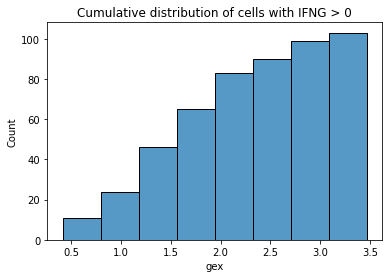

In [11]:
gene = 'IFNG'
genei = np.nonzero(feat[0].values == gene)[0][0]
plot_df = pd.Series(np.asarray(cts.X[genei, :].todense()).squeeze(), index=md['NAME'])
md = md.assign(gex=plot_df.values)

sns.histplot(md.loc[md['gex'] > 0 , 'gex'], cumulative=True)
plt.title('Cumulative distribution of cells with IFNG > 0')

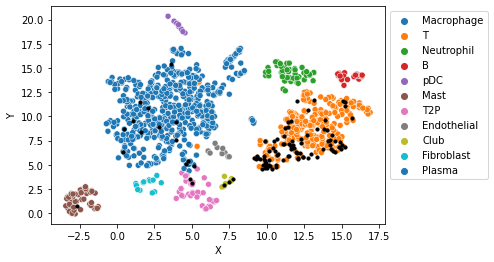

In [12]:
ss = md.sample(n=1000)
sns.scatterplot(x='X', y='Y', hue='CellTypeAnnotations', data=ss, palette='tab10')
plt.legend(bbox_to_anchor=(1, 1))
plt.scatter(x='X', y='Y', c='k', s=10, data=md.loc[md['gex'] > 0])

Text(0.5, 1.0, 'Cumulative distribution of cells with STAT1 > 0')

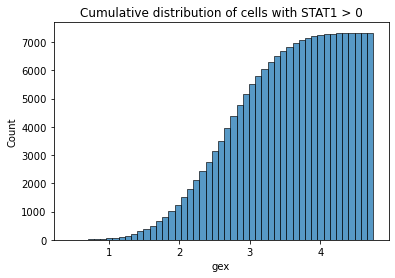

In [13]:
gene = 'STAT1'
genei = np.nonzero(feat[0].values == gene)[0][0]
plot_df = pd.Series(np.asarray(cts.X[genei, :].todense()).squeeze(), index=md['NAME'])
md = md.assign(gex=plot_df.values)

sns.histplot(md.loc[md['gex'] > 0 , 'gex'], cumulative=True)
plt.title('Cumulative distribution of cells with STAT1 > 0')

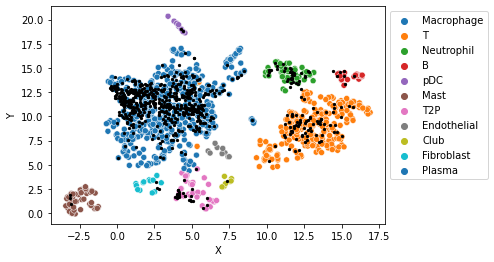

In [14]:
sns.scatterplot(x='X', y='Y', hue='CellTypeAnnotations', data=ss, palette='tab10')
plt.legend(bbox_to_anchor=(1, 1))
plt.scatter(x='X', y='Y', c='k', s=5, data=md.loc[md['gex'] > 3.5])